# Autoencoder vs PCA

In [1]:
from sklearn import decomposition
from matplotlib import pyplot as plt
import tensorflow as tf
import autoencoder_mnist as ae
import argparse, input_data
import numpy as np

In [2]:
def scatter(codes, labels):
    colors = [
        ('#27ae60', 'o'),
        ('#2980b9', 'o'),
        ('#8e44ad', 'o'),
        ('#f39c12', 'o'),
        ('#c0392b', 'o'),
        ('#27ae60', 'x'),
        ('#2980b9', 'x'),
        ('#8e44ad', 'x'),
        ('#c0392b', 'x'),
        ('#f39c12', 'x'),
    ]
    for num in range(10):
        plt.scatter([codes[:,0][i] for i in range(len(labels)) if labels[i] == num],
        [codes[:,1][i] for i in range(len(labels)) if labels[i] == num], 7,
        label=str(num), color = colors[num][0], marker=colors[num][1])
    plt.legend()
    plt.show()

In [3]:
print("\nPULLING UP MNIST DATA")
mnist = input_data.read_data_sets("data/", one_hot=False)
print(mnist.test.labels)


PULLING UP MNIST DATA
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
[7 2 1 ... 4 5 6]



STARTING PCA

GENERATING PCA CODES AND RECONSTRUCTION
[[-1.3160148   2.933087  ]
 [ 0.08081467 -3.7749803 ]
 [-3.711191   -1.7177701 ]
 ...
 [-1.0523494   2.3615978 ]
 [-1.2347659  -0.40564668]
 [ 4.0854053  -0.37129208]]


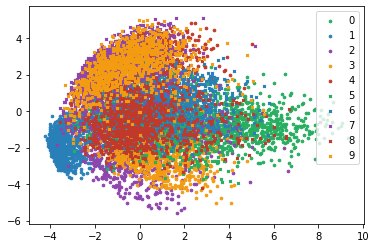

In [4]:
print("\nSTARTING PCA")
pca = decomposition.PCA(n_components=2)
pca.fit(mnist.train.images)

print("\nGENERATING PCA CODES AND RECONSTRUCTION")
pca_codes = pca.transform(mnist.test.images)
print(pca_codes)

scatter(pca_codes, mnist.test.labels)

In [7]:
path = '/home/georg/Jupyter/mnist_autoencoder_hidden=2_logs/model-checkpoint-1000-550000'


STARTING AUTOENCODER
 /home/georg/Jupyter/mnist_autoencoder_hidden=2_logs/model-checkpoint-1000-550000
INFO:tensorflow:Restoring parameters from /home/georg/Jupyter/mnist_autoencoder_hidden=2_logs/model-checkpoint-1000-550000

GENERATING AE CODES AND RECONSTRUCTION


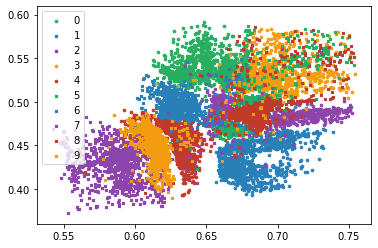

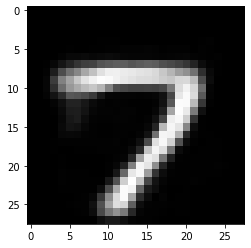

In [24]:
with tf.Graph().as_default():

    with tf.compat.v1.variable_scope("autoencoder_model"):

        x = tf.compat.v1.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
        phase_train = tf.compat.v1.placeholder(tf.bool)

        code = ae.encoder(x, 2, phase_train)

        output = ae.decoder(code, 2, phase_train)

        cost, train_summary_op = ae.loss(output, x)

        global_step = tf.Variable(0, name='global_step', trainable=False)

        train_op = ae.training(cost, global_step)

        eval_op, in_im_op, out_im_op, val_summary_op = ae.evaluate(output, x)

        saver = tf.compat.v1.train.Saver()

        sess = tf.compat.v1.Session()


        print("\nSTARTING AUTOENCODER\n", path)
        sess = tf.compat.v1.Session()
        saver = tf.compat.v1.train.Saver()
        saver.restore(sess, path)

        print("\nGENERATING AE CODES AND RECONSTRUCTION")
        ae_codes, ae_reconstruction = sess.run([code, output], feed_dict={x: mnist.test.images * np.random.randint(2, size=(784)), phase_train: True})

        scatter(ae_codes, mnist.test.labels)

        plt.imshow(ae_reconstruction[0].reshape((28,28)), cmap=plt.cm.gray)
        plt.show()